# Experiment 3: Erdős-Rényi (ER) Random Network Model

**Aim**: Implementation of The Erdős-Rényi (ER) random network growth model and analysis of its properties.

**Theory**:
The G(n, p) model generates a graph of n nodes where each pair of nodes is connected with probability p.
We will analyze:
- Degree Distribution
- Diameter
- Average Clustering Coefficient
- Effect of changing N and P

**Note**: The syllabus mentions "Create a scale-free network using the Erdos-enyi network", which is a contradiction. ER networks have a Poisson degree distribution, not scale-free (power-law). We will implement the ER model as named.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def analyze_er_graph(n, p):
    # Create Graph
    G = nx.erdos_renyi_graph(n, p, seed=42)
    
    # Metrics
    if nx.is_connected(G):
        diameter = nx.diameter(G)
    else:
        # If not connected, diameter is infinity, or we take the largest component
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        diameter = nx.diameter(subgraph)
    
    avg_clustering = nx.average_clustering(G)
    avg_degree = np.mean([d for n, d in G.degree()])
    
    return {
        "N": n,
        "P": p,
        "Diameter": diameter,
        "Avg Clustering": avg_clustering,
        "Avg Degree": avg_degree,
        "Graph": G
    }


In [3]:
# Effect of changing N and P
params = [
    (50, 0.1), (50, 0.3), (50, 0.5),
    (100, 0.1), (100, 0.3), (100, 0.5),
    (200, 0.1)
]

results = []
for n, p in params:
    res = analyze_er_graph(n, p)
    results.append(res)
    
# Display Results Table
df = pd.DataFrame(results).drop(columns=["Graph"])
print("Comparison of Network Properties vary N and P:")
print(df)


Comparison of Network Properties vary N and P:
     N    P  Diameter  Avg Clustering  Avg Degree
0   50  0.1         5        0.062190        4.80
1   50  0.3         3        0.293838       14.72
2   50  0.5         2        0.473467       23.84
3  100  0.1         4        0.087823        9.48
4  100  0.3         2        0.301889       29.54
5  100  0.5         2        0.493341       48.98
6  200  0.1         3        0.100283       19.63


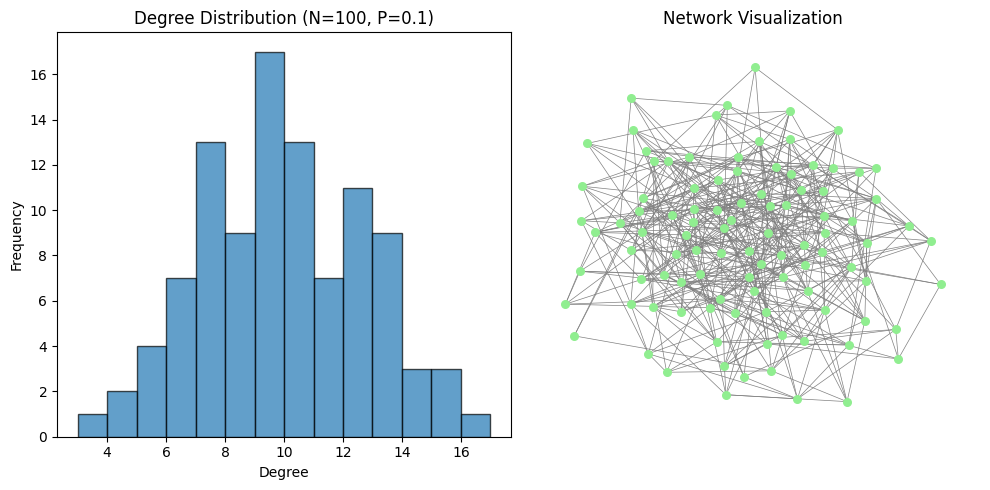

In [4]:
# Visualizing Degree Distribution for one case (N=100, P=0.1)
sample_res = results[3] # N=100, P=0.1
G_sample = sample_res["Graph"]

degrees = [d for n, d in G_sample.degree()]
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), edgecolor='black', alpha=0.7)
plt.title(f"Degree Distribution (N=100, P=0.1)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Network Plot
plt.subplot(1, 2, 2)
pos = nx.spring_layout(G_sample, seed=42)
nx.draw(G_sample, pos, node_size=30, node_color='lightgreen', edge_color='gray', width=0.5)
plt.title("Network Visualization")

plt.tight_layout()
plt.show()


**Observation**:
1. **Average Degree**: Directly proportional to $P \times (N-1)$. As P increases, the graph becomes denser.
2. **Diameter**: As P increases (more edges), the diameter decreases because nodes are reached more easily.
3. **Clustering Coefficient**: In ER graphs, $C \approx P$. We can observe that the average clustering coefficient is close to the probability P.
4. **Degree Distribution**: Resembles a Poisson distribution (bell curve), typical for Random Networks, unlike the Power Law seen in Scale-Free networks.
